In [1]:
!pip install tensorflow_gpu==2.0.0

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 3.8MB 44.8MB/s 
     |████████████████████████████████| 450kB 41.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ec530013b88c63d7e75aee447d26156407ba639e39ba95d52f94dd0406b95db9
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [3]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_train_all.shape, y_train_all.shape

((60000, 28, 28), (60000,))

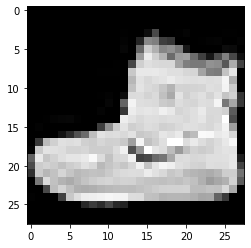

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train_all[0], cmap='gray')
plt.show()

In [6]:
print(y_train_all[:10])

[9 0 0 3 0 2 7 2 5 5]


In [7]:
class_names = ['티셔츠/윗도리', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']
print(class_names[y_train_all[0]])

앵클부츠


In [8]:
import numpy as np
np.bincount(y_train_all)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [10]:
print(np.bincount(y_train))
print(np.bincount(y_val))

[4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
[1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]


In [0]:
x_train = x_train / 255
x_val = x_val / 255

In [0]:
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

In [13]:
print(x_train.shape, x_val.shape)

(48000, 784) (12000, 784)


In [14]:
tf.keras.utils.to_categorical([0, 1, 3])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [0]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [16]:
print(y_train_encoded.shape, y_val_encoded.shape)

(48000, 10) (12000, 10)


In [17]:
print(y_train[0], y_train_encoded[0])

6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

In [0]:
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train_encoded, epochs=40, validation_data=(x_val, y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 5s 101us/sample - loss: 1.3776 - accuracy: 0.6472 - val_loss: 0.9589 - val_accuracy: 0.7272
Epoch 2/40
48000/48000 [==============================] - 4s 85us/sample - loss: 0.8414 - accuracy: 0.7428 - val_loss: 0.7513 - val_accuracy: 0.7628
Epoch 3/40
48000/48000 [==============================] - 4s 89us/sample - loss: 0.7112 - accuracy: 0.7654 - val_loss: 0.6657 - val_accuracy: 0.7803
Epoch 4/40
48000/48000 [==============================] - 5s 97us/sample - loss: 0.6461 - accuracy: 0.7814 - val_loss: 0.6144 - val_accuracy: 0.7906
Epoch 5/40
48000/48000 [==============================] - 5s 108us/sample - loss: 0.6042 - accuracy: 0.7952 - val_loss: 0.5785 - val_accuracy: 0.8026
Epoch 6/40
48000/48000 [==============================] - 4s 86us/sample - loss: 0.5744 - accuracy: 0.8041 - val_loss: 0.5524 - val_accuracy: 0.8094
Epoch 7/40
48000/48000 [==============================

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


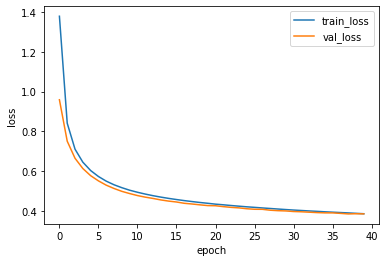

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

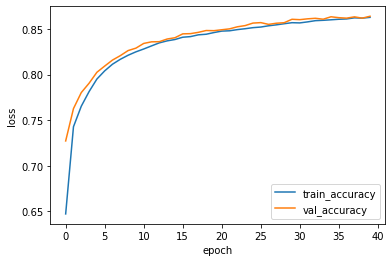

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [25]:
loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
print(accuracy)

0.86408335


In [0]:
import numpy as np
w = np.array([2, 1, 5, 3])
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])

In [27]:
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


In [28]:
w_r = w[::-1]
print(w_r)

[3 5 1 2]


In [29]:
for i in range(6):
  print(np.dot(x[i:i+4], w_r))

63
48
49
28
21
20


In [30]:
from scipy.signal import convolve
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

In [31]:
from scipy.signal import correlate
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

In [32]:
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [33]:
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

In [34]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], [0, 0]])
from scipy.signal import correlate2d
correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [35]:
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [0]:
import tensorflow as tf
x_4d = x.astype(np.float).reshape(1, 3, 3, 1)
w_4d = w.reshape(2, 2, 1, 1)

In [0]:
c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding='SAME')

In [38]:
c_out.numpy().reshape(3, 3)

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

In [0]:
class ConvolutionNetwork:
  def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
    self.n_kernels = n_kernels
    self.optimizer = None
    self.conv_w = None
    self.conv_b = None
    self.units = units
    self.batch_size = batch_size
    self.w1 = None
    self.b1 = None
    self.w2 = None
    self.b2 = None
    self.losses = []
    self.val_losses = []
    self.lr = learning_rate

  def forpass(self, x):
    c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
    r_out = tf.nn.relu(c_out)
    p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
    f_out = tf.reshape(p_out, [x.shape[0], -1])
    z1 = tf.matmul(f_out, self.w1) + self.b1
    a1 = tf.nn.relu(z1)
    z2 = tf.matmul(a1, self.w2) + self.b2
    return z2

  def init_weights(self, input_shape, n_classes):
    g = tf.initializers.glorot_uniform()
    self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
    self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
    n_features = 14 * 14 * self.n_kernels
    self.w1 = tf.Variable(g((n_features, self.units)))
    self.b1 = tf.Variable(np.zeros(self.units), dtype=float)
    self.w2 = tf.Variable(g((self.units, n_classes)))
    self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)

  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    self.init_weights(x.shape, y.shape[1])
    self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)

    for i in range(epochs):
      print('epochs', i, end=' ')
      batch_losses = []
      for x_batch, y_batch in self.gen_batch(x, y):
        print('.', end='')
        self.training(x_batch, y_batch)
        batch_losses.append(self.get_loss(x_batch, y_batch))
      print()
      self.losses.append(np.mean(batch_losses))
      self.val_losses.append(self.get_loss(x_val, y_val))

  def gen_batch(self, x, y):
    bins = len(x) // self.batch_size
    indexes = np.random.permutation(np.arange(len(x)))
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i + 1)
      yield x[start:end], y[start:end]

  def training(self, x, y):
    m = len(x)
    with tf.GradientTape() as tape:
      z = self.forpass(x)
      loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
      loss = tf.reduce_mean(loss)

    weights_list = [self.conv_w, self.conv_b, self.w1, self.b1, self.w2, self.b2]
    grads = tape.gradient(loss, weights_list)
    self.optimizer.apply_gradients(zip(grads, weights_list))

  def predict(self, x):
    z = self.forpass(x)
    return np.argmax(z.numpy(), axis=1)
  
  def score(self, x, y):
    return np.mean(self.predict(x) == np.argmax(y, axis=1))

  def get_loss(self, x, y):
    z = self.forpass(x)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
    return loss.numpy()

In [0]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [0]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [0]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [44]:
x_train.shape

(48000, 28, 28, 1)

In [0]:
x_train = x_train / 255
x_val = x_val / 255

In [47]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, x_val=x_val, y_val=y_val_encoded, epochs=20)

epochs 0 .......................................................................................................................................................................................................................................................................................................................................................................................
epochs 1 .......................................................................................................................................................................................................................................................................................................................................................................................
epochs 2 .............................................................................................................................................................................................................................

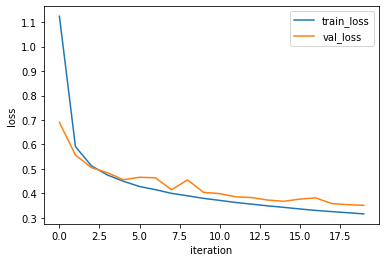

In [48]:
import matplotlib.pyplot as plt

plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [49]:
cn.score(x_val, y_val_encoded)

0.8776666666666667

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [0]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

In [0]:
conv1.add(MaxPooling2D((2, 2)))

In [0]:
conv1.add(Flatten())

In [0]:
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [57]:
conv1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 27s 560us/sample - loss: 0.4433 - accuracy: 0.8429 - val_loss: 0.3377 - val_accuracy: 0.8784
Epoch 2/20
48000/48000 [==============================] - 26s 545us/sample - loss: 0.3099 - accuracy: 0.8883 - val_loss: 0.2943 - val_accuracy: 0.8959
Epoch 3/20
48000/48000 [==============================] - 26s 538us/sample - loss: 0.2658 - accuracy: 0.9019 - val_loss: 0.2708 - val_accuracy: 0.9047
Epoch 4/20
48000/48000 [==============================] - 26s 549us/sample - loss: 0.2344 - accuracy: 0.9136 - val_loss: 0.2629 - val_accuracy: 0.9057
Epoch 5/20
48000/48000 [==============================] - 26s 548us/sample - loss: 0.2098 - accuracy: 0.9221 - val_loss: 0.2545 - val_accuracy: 0.9092
Epoch 6/20
48000/48000 [==============================] - 26s 542us/sample - loss: 0.1873 - accuracy: 0.9299 - val_loss: 0.2583 - val_accuracy: 0.9083
Epoch 7/20
48000/48000 [====================

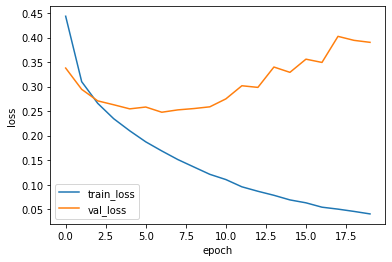

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

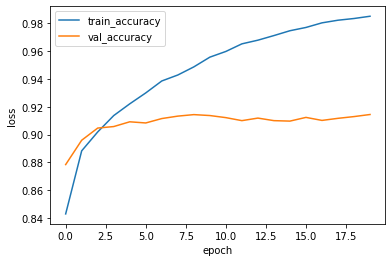

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [0]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [66]:
conv2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [67]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 26s 546us/sample - loss: 0.5120 - accuracy: 0.8127 - val_loss: 0.3562 - val_accuracy: 0.8735
Epoch 2/20
48000/48000 [==============================] - 26s 537us/sample - loss: 0.3760 - accuracy: 0.8623 - val_loss: 0.3092 - val_accuracy: 0.8908
Epoch 3/20
48000/48000 [==============================] - 26s 536us/sample - loss: 0.3369 - accuracy: 0.8773 - val_loss: 0.2799 - val_accuracy: 0.8994
Epoch 4/20
48000/48000 [==============================] - 26s 534us/sample - loss: 0.3065 - accuracy: 0.8855 - val_loss: 0.2635 - val_accuracy: 0.9069
Epoch 5/20
48000/48000 [==============================] - 26s 538us/sample - loss: 0.2917 - accuracy: 0.8922 - val_loss: 0.2605 - val_accuracy: 0.9058
Epoch 6/20
48000/48000 [==============================] - 26s 540us/sample - loss: 0.2702 - accuracy: 0.8982 - val_loss: 0.2534 - val_accuracy: 0.9092
Epoch 7/20
48000/48000 [====================

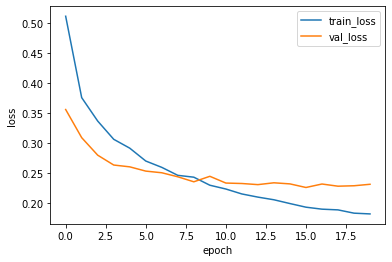

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

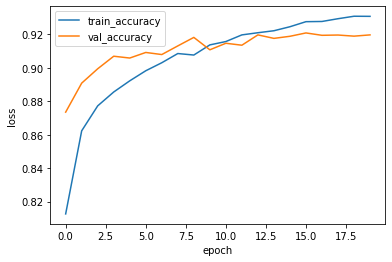

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()